# Import librarries

In [3]:
from __future__ import print_function
from gensim.models import KeyedVectors

# Import Data

In [ ]:
# Creating the model
en_model = KeyedVectors.load_word2vec_format('cc.fr.300.vec')

In [ ]:
#https://blog.manash.me/how-to-use-pre-trained-word-vectors-from-facebooks-fasttext-a71e6d55f27
# Getting the tokens 
words = []
for word in en_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(en_model[words[0]])
))



# Pick a word 
find_similar_to = 'redhat'

# Finding out similar words [default= top 10]
for similar_word in en_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(similar_word[0], similar_word[1]))


In [ ]:

from __future__ import print_function
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
limit = 1000000
vector_dim = 300
array_of_word_to_keep=["linux","docker","redhat","ubuntu","serveur"]


# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in en_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    if word in array_of_word_to_keep:
        print(word)
        words.append(word)
#     print(word)
    # Appending the vectors 
    embedding = np.append(embedding, en_model[word])

    i += 1



serveur
linux
ubuntu


In [ ]:
# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)

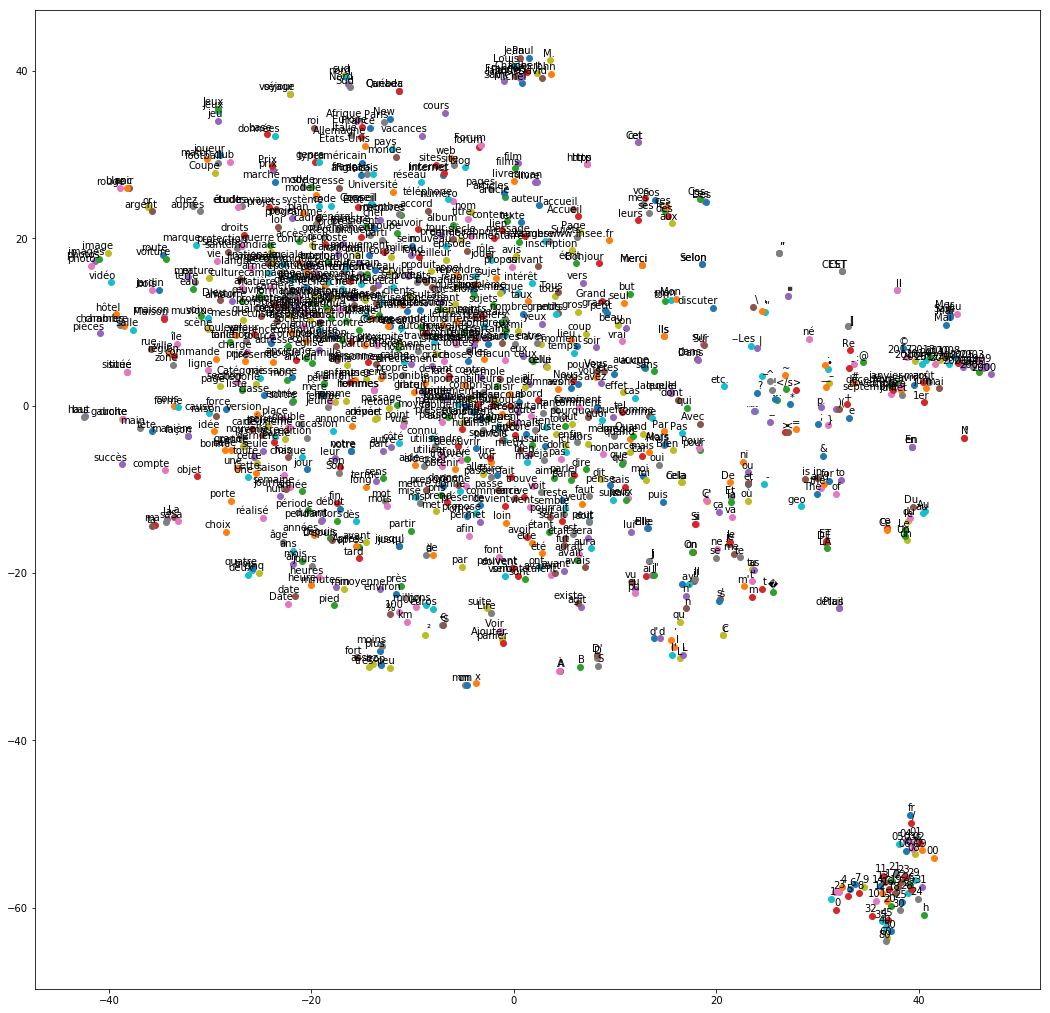

In [13]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)